# Predicting the sale price of bulldozers using Machine Learning

In this project, we will be going through the example and will predict the sale price of bulldozers.

## 1. Problem Definition
How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

## 2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

Note: The goal for most regression evaluation metrics is to minimize the error. For example, our goal for this project will be to build a machine learning model which minimises RMSLE.

## 4. Features
Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/18ly-bLR8sbDJLITkWG7ozKm8l3RyieQ2Fpgix-beSYI/edit?usp=sharing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# Import training and validation sets
df = pd.read_csv("/TrainAndValid.csv",
                 low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10648 entries, 0 to 10647
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalesID                   10648 non-null  int64  
 1   SalePrice                 10648 non-null  int64  
 2   MachineID                 10648 non-null  int64  
 3   ModelID                   10648 non-null  int64  
 4   datasource                10647 non-null  float64
 5   auctioneerID              10647 non-null  float64
 6   YearMade                  10647 non-null  float64
 7   MachineHoursCurrentMeter  10647 non-null  float64
 8   UsageBand                 9298 non-null   object 
 9   saledate                  10647 non-null  object 
 10  fiModelDesc               10647 non-null  object 
 11  fiBaseModel               10647 non-null  object 
 12  fiSecondaryDesc           6942 non-null   object 
 13  fiModelSeries             1461 non-null   object 
 14  fiMode

In [4]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      1
auctioneerID                    1
YearMade                        1
MachineHoursCurrentMeter        1
UsageBand                    1350
saledate                        1
fiModelDesc                     1
fiBaseModel                     1
fiSecondaryDesc              3706
fiModelSeries                9187
fiModelDescriptor            8063
ProductSize                  5743
fiProductClassDesc              1
state                           1
ProductGroup                    1
ProductGroupDesc                1
Drive_System                 8229
Enclosure                       7
Forks                        5250
Pad_Type                     8837
Ride_Control                 7101
Stick                        8837
Transmission                 6420
Turbocharged                 8837
Blade_Extension             10042
Blade_Width   

In [5]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

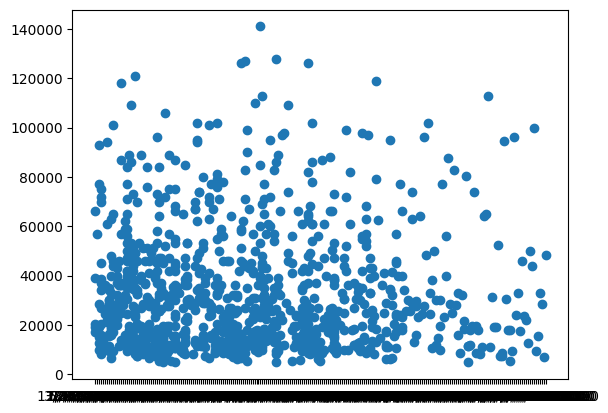

In [6]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

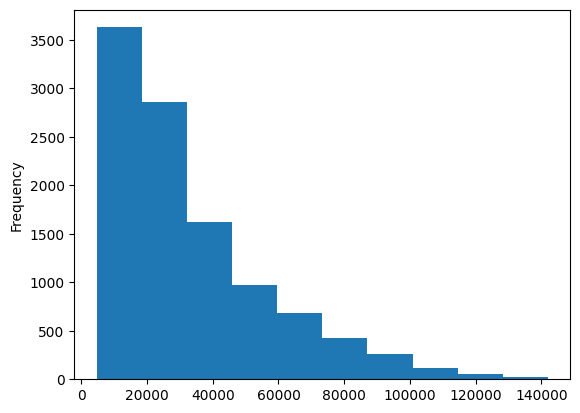

In [7]:
df.SalePrice.plot.hist();

### Parsing Dates

When we work with time series data, we want to enrich the time and date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameters.

In [8]:
# Import data again but this time parse dates
df = pd.read_csv("/TrainAndValid.csv", low_memory=False, parse_dates=["saledate"])



In [9]:
df.saledate.dtype

dtype('<M8[ns]')

In [10]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

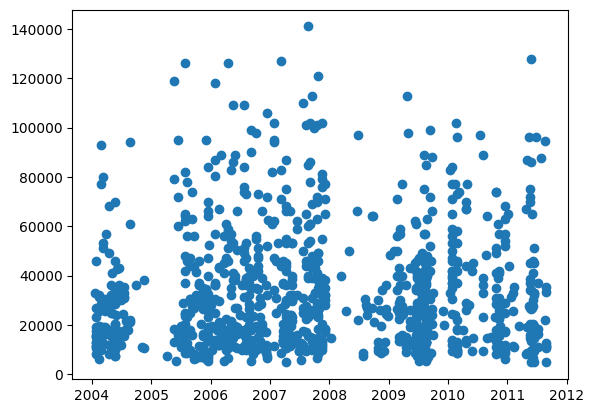

In [11]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])

In [12]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Transpose to view all the column names.
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [14]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [15]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

7648   2004-01-05
8228   2004-01-09
6770   2004-01-16
4051   2004-01-19
5086   2004-01-20
243    2004-01-20
4035   2004-01-27
2771   2004-01-29
3364   2004-01-29
349    2004-01-29
3334   2004-01-29
3282   2004-01-29
9796   2004-01-29
3183   2004-01-29
2658   2004-01-29
3159   2004-01-29
465    2004-01-29
3150   2004-01-29
3122   2004-01-29
3396   2004-01-29
Name: saledate, dtype: datetime64[ns]

In [16]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
7648,1165000,27000,733687,7057,121,3,1995,4368,Medium,2004-01-05,...,24 inch,"9' 10""",Manual,None or Unspecified,Triple,NaN,NaN,NaN,NaN,NaN
8228,1166933,10750,1035166,8861,121,3,2002,603,Low,2004-01-09,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
6770,1162057,35000,1060038,4763,121,3,1999,479,Low,2004-01-16,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
4051,1152803,30000,1000789,12263,121,3,1998,4302,Medium,2004-01-19,...,None or Unspecified,None or Unspecified,Hydraulic,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
5086,1156368,19000,1060567,3822,121,3,1990,0,NaN,2004-01-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


### Make a copy of the original DataFrame

We make a copy of the original DataFrame so when we manipulate the copy, we've still got our original data.

In [17]:
# Make a copy
df_tmp = df.copy()

In [18]:
# Exactly same dataframe
df_tmp.saledate.head(20)

7648   2004-01-05
8228   2004-01-09
6770   2004-01-16
4051   2004-01-19
5086   2004-01-20
243    2004-01-20
4035   2004-01-27
2771   2004-01-29
3364   2004-01-29
349    2004-01-29
3334   2004-01-29
3282   2004-01-29
9796   2004-01-29
3183   2004-01-29
2658   2004-01-29
3159   2004-01-29
465    2004-01-29
3150   2004-01-29
3122   2004-01-29
3396   2004-01-29
Name: saledate, dtype: datetime64[ns]

### Add datetime parameters for `saledate` column

In [19]:
df_tmp[:1].saledate.dt.year

7648    2004
Name: saledate, dtype: int64

In [20]:
df_tmp[:1].saledate.dt.day

7648    5
Name: saledate, dtype: int64

In [21]:
df_tmp[:1].saledate

7648   2004-01-05
Name: saledate, dtype: datetime64[ns]

In [22]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

In [23]:
# Now we 've enriched our DataFrame with date time features, we can remove saledate
df_tmp.drop("saledate", axis=1, inplace=True)

In [24]:
# Check the values of different columns.
df_tmp.state.value_counts()

Texas             1677
Florida           1599
California        1013
Georgia            851
North Carolina     720
Louisiana          527
Alabama            470
Ohio               379
Illinois           375
West Virginia      334
Pennsylvania       319
Arizona            310
Missouri           302
Virginia           298
Tennessee          296
Michigan           284
Colorado           281
Nevada             267
New York           254
South Carolina     250
Utah               242
Kentucky           217
Oklahoma           212
Indiana            209
Mississippi        181
New Jersey         177
Maryland           174
Wisconsin          171
Minnesota          165
Washington         165
Arkansas           161
Kansas             153
Oregon             147
Iowa               130
Idaho              122
New Mexico         102
Wyoming             97
Massachusetts       94
North Dakota        60
New Hampshire       59
Delaware            54
South Dakota        51
Maine               45
Hawaii     

In [25]:
len(df_tmp)

14180

## 5. Modelling

We've done enough enough EDA (we could always do more) but let's start to do some model-driven EDA.

In [26]:
# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=-1, random_state=42)

# model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

### Convert String to categories

One way we can turn our data into numbers is by converting them into pandas categories.

In [27]:
df_tmp.head().T

,7648,8228,6770,4051,5086
SalesID,1165000,1166933,1162057,1152803,1156368
SalePrice,27000,10750,35000,30000,19000
MachineID,733687,1035166,1060038,1000789,1060567
ModelID,7057,8861,4763,12263,3822
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1995,2002,1999,1998,1990
MachineHoursCurrentMeter,4368,603,479,4302,0
UsageBand,Medium,Low,Low,Medium,NaN
fiModelDesc,312,803,650G,SE280LC-2,950E


In [28]:
pd.api.types.is_string_dtype(df_tmp["UsageBand"])

True

In [29]:
# Find the colummns which contain strings
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [30]:
# If you're wondering what df.items() does, here's an example.
random_dict = {"key1": "hello", "key2": "world!"}

for key, value in random_dict.items():
  print(f"This is a key: {key}", f"This is a value: {value}")

This is a key: key1 This is a value: hello
This is a key: key2 This is a value: world!


In [31]:
# This will turn all of the string value into category values
for label, content in df_tmp.items():
  if pd.api.types.is_string_dtype(content):
    df_tmp[label] = content.astype("category").cat.as_ordered()

In [32]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14180 entries, 7648 to 10012
Data columns (total 57 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   SalesID                   14180 non-null  int64   
 1   SalePrice                 14180 non-null  int64   
 2   MachineID                 14180 non-null  int64   
 3   ModelID                   14180 non-null  int64   
 4   datasource                14180 non-null  int64   
 5   auctioneerID              14180 non-null  int64   
 6   YearMade                  14180 non-null  int64   
 7   MachineHoursCurrentMeter  14180 non-null  int64   
 8   UsageBand                 12428 non-null  category
 9   fiModelDesc               14180 non-null  category
 10  fiBaseModel               14180 non-null  category
 11  fiSecondaryDesc           9177 non-null   category
 12  fiModelSeries             2051 non-null   category
 13  fiModelDescriptor         3498 non-null   c

In [33]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'Washington DC', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [34]:
df_tmp.state.value_counts()

Texas             1677
Florida           1599
California        1013
Georgia            851
North Carolina     720
Louisiana          527
Alabama            470
Ohio               379
Illinois           375
West Virginia      334
Pennsylvania       319
Arizona            310
Missouri           302
Virginia           298
Tennessee          296
Michigan           284
Colorado           281
Nevada             267
New York           254
South Carolina     250
Utah               242
Kentucky           217
Oklahoma           212
Indiana            209
Mississippi        181
New Jersey         177
Maryland           174
Wisconsin          171
Washington         165
Minnesota          165
Arkansas           161
Kansas             153
Oregon             147
Iowa               130
Idaho              122
New Mexico         102
Wyoming             97
Massachusetts       94
North Dakota        60
New Hampshire       59
Delaware            54
South Dakota        51
Maine               45
Hawaii     

In [35]:
df_tmp.state.cat.codes

7648     31
8228      9
6770      0
4051     42
5086     42
         ..
10026     3
10016     8
10015     2
9996      0
10012    16
Length: 14180, dtype: int8

Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data...

### Save preprocessed data

In [36]:
# Export current tmp dataframe
df_tmp.to_csv("/train_tmp.csv", index=False)

In [37]:
# Import preprocessed data
df_tmp = pd.read_csv("/train_tmp.csv", low_memory=False)

df_tmp.head().T

,0,1,2,3,4
SalesID,1165000,1166933,1162057,1152803,1156368
SalePrice,27000,10750,35000,30000,19000
MachineID,733687,1035166,1060038,1000789,1060567
ModelID,7057,8861,4763,12263,3822
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1995,2002,1999,1998,1990
MachineHoursCurrentMeter,4368,603,479,4302,0
UsageBand,Medium,Low,Low,Medium,NaN
fiModelDesc,312,803,650G,SE280LC-2,950E


In [38]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter        0
UsageBand                    1752
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              5003
fiModelSeries               12129
fiModelDescriptor           10682
ProductSize                  7461
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                11067
Enclosure                       7
Forks                        7109
Pad_Type                    11879
Ride_Control                 9589
Stick                       11879
Transmission                 8706
Turbocharged                11879
Blade_Extension             13371
Blade_Width                 13371
Enclosure_Type

### Fill Missing Values

#### Fill Numerical missing values first

In [39]:
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    print(label)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [40]:
df_tmp.ModelID

0         7057
1         8861
2         4763
3        12263
4         3822
         ...  
14175     4605
14176     5893
14177     3409
14178     1580
14179     3856
Name: ModelID, Length: 14180, dtype: int64

In [41]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [42]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      # Add a binary column which tells us that if the data is missing or not
      df_tmp[label+"_is_missing"] = pd.isnull(content)
      # Fill missing numeric values with median
      df_tmp[label] = content.fillna(content.median())

In [43]:
# Demonstrate how median is more robust than mean
hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)

(100.0, 999100.8991008991, 100.0, 100.0)

In [44]:
hundreds

array([100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 10

In [45]:
hundreds_billion

array([       100,        100,        100, ...,        100,        100,
       1000000000])

In [46]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
  if pd.api.types.is_numeric_dtype(content):
    if pd.isnull(content).sum():
      print(label)

In [47]:
# Check to see how many examples were missing
df_tmp.auctioneerID.value_counts()

3    14180
Name: auctioneerID, dtype: int64

In [48]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter        0
UsageBand                    1752
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              5003
fiModelSeries               12129
fiModelDescriptor           10682
ProductSize                  7461
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                11067
Enclosure                       7
Forks                        7109
Pad_Type                    11879
Ride_Control                 9589
Stick                       11879
Transmission                 8706
Turbocharged                11879
Blade_Extension             13371
Blade_Width                 13371
Enclosure_Type

### Filling and turning categorical variables into numbers

In [49]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [50]:
pd.Categorical(df_tmp["state"]).dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Rhode Island', 'South Carolina', 'South Dakota',
                  'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
                  'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
                  'Wyoming'],
, ordered=False)

In [51]:
# Turn Categorical variables into numbers and fill missing
for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    # Add binary column to indicate whether sample had missing value
    df_tmp[label+"_is_missing"] = pd.isnull(content)
    # Turn categories into numbers and add +1
    df_tmp[label] = pd.Categorical(content).codes+1

In [52]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14180 entries, 0 to 14179
Columns: 101 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(44), int16(2), int64(13), int8(42)
memory usage: 2.6 MB


In [53]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1165000,1166933,1162057,1152803,1156368
SalePrice,27000,10750,35000,30000,19000
MachineID,733687,1035166,1060038,1000789,1060567
ModelID,7057,8861,4763,12263,3822
datasource,121,121,121,121,121
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,False,True,True
Blade_Type_is_missing,True,True,False,True,True
Travel_Controls_is_missing,True,True,False,True,True
Differential_Type_is_missing,True,True,True,True,False


In [54]:
df_tmp.isna().sum()[:20]

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
dtype: int64

Now that all of data is numeric as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [55]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1165000,27000,733687,7057,121,3,1995,4368,3,230,...,False,False,False,False,False,True,True,True,True,True
1,1166933,10750,1035166,8861,121,3,2002,603,2,670,...,False,False,False,False,False,True,True,True,True,True
2,1162057,35000,1060038,4763,121,3,1999,479,2,519,...,True,True,True,True,True,False,False,False,True,True
3,1152803,30000,1000789,12263,121,3,1998,4302,3,1658,...,False,False,False,False,False,True,True,True,True,True
4,1156368,19000,1060567,3822,121,3,1990,0,0,784,...,True,True,True,True,True,True,True,True,False,False


In [56]:
len(df_tmp)

14180

In [57]:
%%time
# Instantiate model
model = RandomForestRegressor(n_jobs=-1, random_state=42)

# Fit the model
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

CPU times: user 29.5 s, sys: 234 ms, total: 29.7 s
Wall time: 24.9 s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [58]:
# Score the model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9819896101329466

### Splitting data into train/validation sets

In [59]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1165000,27000,733687,7057,121,3,1995,4368,3,230,...,False,False,False,False,False,True,True,True,True,True
1,1166933,10750,1035166,8861,121,3,2002,603,2,670,...,False,False,False,False,False,True,True,True,True,True
2,1162057,35000,1060038,4763,121,3,1999,479,2,519,...,True,True,True,True,True,False,False,False,True,True
3,1152803,30000,1000789,12263,121,3,1998,4302,3,1658,...,False,False,False,False,False,True,True,True,True,True
4,1156368,19000,1060567,3822,121,3,1990,0,0,784,...,True,True,True,True,True,True,True,True,False,False


In [60]:
df_tmp.saleYear.value_counts()

2008    3141
2007    1975
2006    1888
2005    1780
2009    1764
2004    1438
2010    1207
2011     987
Name: saleYear, dtype: int64

In [61]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear==2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(0, 14180)

In [62]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((14180, 100), (14180,), (0, 100), (0,))

In [63]:
y_train

0        27000
1        10750
2        35000
3        30000
4        19000
         ...  
14175    24000
14176    54000
14177    14500
14178    38000
14179    25000
Name: SalePrice, Length: 14180, dtype: int64

In [64]:
y_train

0        27000
1        10750
2        35000
3        30000
4        19000
         ...  
14175    24000
14176    54000
14177    14500
14178    38000
14179    25000
Name: SalePrice, Length: 14180, dtype: int64

### Building an evaluation function

In [65]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Caculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores

## Testing our model on a subset (to tune the hyperparameters)

In [66]:
# This takes far too long... for experimenting

# %%time
# model = RandomForestRegressor(n_jobs=-1,
#                               random_state=42)

# model.fit(X_train, y_train)

In [67]:
len(X_train)

14180

In [68]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)

In [69]:
# %%time
# Cutting down on the max number of samples each estimator can see improves training time
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [70]:
(X_train.shape[0] * 100) / 1000000

1.418

In [71]:
10000 * 100

1000000

### Hyerparameter tuning with RandomizedSearchCV

In [72]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

CPU times: user 36.4 s, sys: 249 ms, total: 36.7 s
Wall time: 25 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [73]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': 50,
 'min_samples_split': 6,
 'min_samples_leaf': 19,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

### Train a model with the best hyperparamters
**Note**: These were found after 100 iterations of `RandomizedSearchCV`

In [74]:
%%time

# Most ideal hyperparamters
ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None,
                                    random_state=42) # random state so our results are reproducible

# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: user 4.64 s, sys: 37.1 ms, total: 4.67 s
Wall time: 2.46 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [75]:
ideal_model

RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

### Make predictions on test data

In [76]:
# Import the test data
df_test = pd.read_csv("/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])

df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


### Preprocessing the data (getting the test dataset in the same format as our training dataset)

In [78]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)

    # Fill the numeric rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

        # Filled categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add +1 to the category code because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1

    return df

In [79]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [81]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1165000,733687,7057,121,3,1995,4368,3,230,109,...,False,False,False,False,False,True,True,True,True,True
1,1166933,1035166,8861,121,3,2002,603,2,670,256,...,False,False,False,False,False,True,True,True,True,True
2,1162057,1060038,4763,121,3,1999,479,2,519,209,...,True,True,True,True,True,False,False,False,True,True
3,1152803,1000789,12263,121,3,1998,4302,3,1658,729,...,False,False,False,False,False,True,True,True,True,True
4,1156368,1060567,3822,121,3,1990,0,0,784,307,...,True,True,True,True,True,True,True,True,False,False


In [82]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)

set()

In [83]:
# Manually adjust df_test to have auctioneerID_is_missing column
df_test["auctioneerID_is_missing"] = False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing,auctioneerID_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,True,True,True,True,True,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,True,True,True,True,True,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,False,False,False,True,True,False


We've made some predictions but they're not in the same format Kaggle is asking for: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [92]:
# Export prediction data
df_preds.to_csv("/test_predictions.csv", index=False)

## Feature Importance
Feature importance seeks to figure out which different attributes of the data were most importance when it comes to predicting the target variable (SalePrice).

In [88]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([9.86896535e-03, 2.39604137e-02, 4.59134561e-02, 0.00000000e+00,
       0.00000000e+00, 1.09161742e-01, 2.68712047e-02, 2.33008753e-03,
       3.78268760e-02, 2.70464586e-02, 5.70733614e-02, 4.24555886e-03,
       1.42923062e-02, 6.48893398e-02, 7.91598658e-02, 7.03731467e-03,
       2.54113633e-03, 6.52802443e-03, 1.22176488e-03, 1.31427731e-01,
       5.22273122e-04, 2.09023875e-03, 6.81257810e-04, 8.00090679e-05,
       7.80549913e-03, 3.13693784e-05, 2.00420791e-03, 2.46130900e-03,
       1.23860007e-03, 1.27537782e-03, 1.96409839e-02, 4.94773679e-04,
       8.93365794e-03, 4.46390537e-03, 2.12571749e-03, 7.98797682e-03,
       9.53818596e-04, 5.20565614e-02, 2.13799589e-02, 1.29118390e-02,
       5.42904304e-03, 1.18465161e-03, 2.32312282e-03, 8.22931681e-04,
       7.66944068e-04, 6.70826152e-04, 1.22209098e-04, 6.47303433e-03,
       1.04315808e-02, 4.85566987e-04, 1.73447177e-04, 2.82761233e-02,
       3.52109963e-03, 5.39782927e-03, 1.19199381e-03, 9.08181768e-03,
      

In [89]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

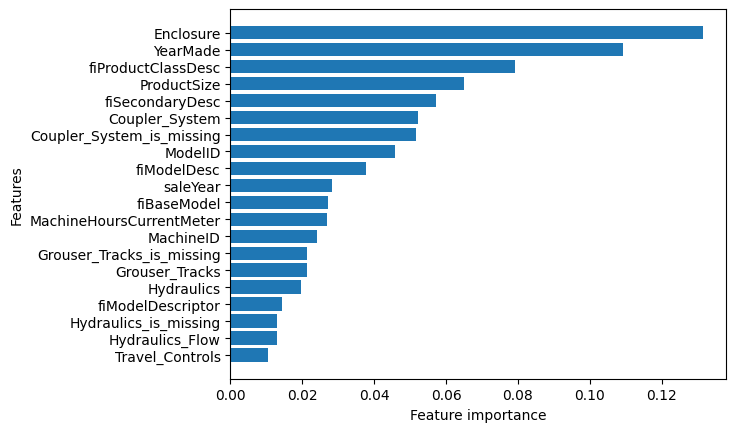

In [90]:
plot_features(X_train.columns, ideal_model.feature_importances_)

In [91]:
df["Enclosure"].value_counts()

OROPS         5848
EROPS w AC    4784
EROPS         3541
Name: Enclosure, dtype: int64